<h1 style="text-align: center; text-decoration: underline;">Modeling</h1>
<h2 style="color:darkred"> Contents: </h2>
<pre>
<h2 style="color:darkred">Modeling using:<br>
        <h3><pre style="color:darkblue"> 
                        "Topic"                    "Line"<br>
        ⅰ. Linear Regression With One Variable     "In[02]"<br>
        ⅱ. Linear Regression Multiple Variables    "In[11]"<br>
        ⅲ. Logistic Regression                    "In[24]"<br>
        ⅳ. Decision Tree                          "In[51]"<br>
        ⅴ. Random Forest                           "In[60]"<br>
        ⅵ. Support Vector Machine (SVM)           "In[64]"<br>
        ⅵⅰ. Naive Bayes                            "In[97]"<br>
        ⅵⅰⅰ. Xgboost                                "In[119]"<br>
        </pre></h3>
</h2>

<h2 style="color:darkred">Techniques:
        <h5><pre style="color:darkblue">
             "Topic"                  "Line"<br>
        • One Hot Encoding           "In[18]"<br>               
        • Spliting                   "In[34]"<br>                       
        • HeatMap visualization      "In[50]"<br>   
        • KFold Validation           "In[81]"<br>
        • Clustring "Grouping"       "In[87]"<br>
        • Scaling and Elbow plot     "In[92,95]"<br> 
        • Pipeline Steps             "In[103]"<br>
        • Grid Search                "In[106]"<br>
        • RandomizedSearchCV         "In[116]"<br>
        • Accuracy                   "In[123]"<br>
        • Saving and loading Models  "In[124]"<br>
           </pre> </h5>
</h2>
</pre>
<hr>
<h3> There are three popular ensemble learning techniques used in machine learning: </h3>
<h2> 1- Bagging </h2>
<img height=800 width=800 src="https://aiml.com/wp-content/uploads/2023/03/Bagging-2.png" />
<h2> 2- Boosting  </h2>
<img height=800 width=800 src="https://media.geeksforgeeks.org/wp-content/uploads/20210707140911/Boosting.png" />
<h2>3- Stacking   </h2>
<img height=800 width=800 src="https://miro.medium.com/v2/resize:fit:1050/1*DM1DhgvG3UCEZTF-Ev5Q-A.png" />


<hr>
<h3 > Libraries : </h3>
<pre style = color:darkgray>
<h3>
sklearn 
xgboost
warnings
numpy
pandas 
matplotlib 
seaborn
opencv
</h3>
</pre>

<h6>
Note:<pre> import only The libraries that u need i am just importing all of them for learning purpose</pre></h6>

In [1]:
from sklearn import linear_model  # LinearRegerssion, LogisticRegerssion
from sklearn import tree  # DecisionTreeClassifier
from sklearn import model_selection  # train_test_spilit, cross_val_score, RandomizedSearchCV
from sklearn.cluster import KMeans
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import load_digits, load_iris
from sklearn.naive_bayes import MultinomialNB
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from sklearn.feature_extraction.text import CountVectorizer

import xgboost as xgb
import seaborn as sn  # heatmap
import pandas as pd
import numpy as np
import warnings
import matplotlib.pyplot as plt

<h3 style="color:darkred" align="center">(A) Machine Learning With Python: Linear Regression With One Variable</h3>

In [2]:
# reading The data that we are going to work at
df = pd.read_csv("Data/homeprices.csv")

##### Below table represents current home prices in monroe township based on square feet area, new jersey

In [3]:
df

,area,price
0,2600,550000
1,3000,565000
2,3200,610000
3,3600,680000
4,4000,725000


##### **Problem Statement**: Given above data build a machine learning model that can predict home prices based on square feet area


You can represent values in above table as a scatter plot (values are shown in red markers). After that one can draw a straight line that best fits values on chart. 
<h3> price = slope * area + b <br>
    y = mx+b</h3>

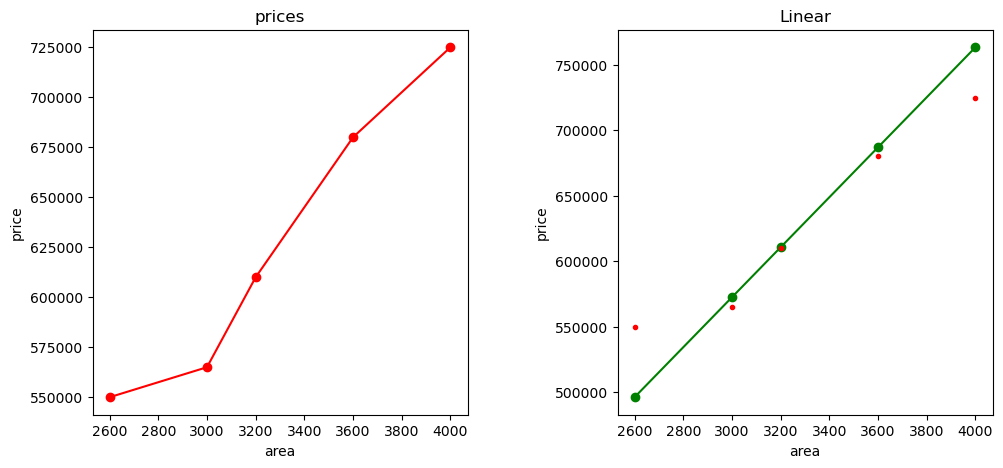

In [4]:
plt.figure(figsize=(10, 5))
plt.subplots_adjust(left=0.1, right=1, wspace=0.4)

plt.subplot(1, 2, 1)
plt.xlabel("area")
plt.ylabel("price")
plt.title("prices")

plt.plot(df["area"], df["price"], "ro-")

plt.subplot(1, 2, 2)
plt.xlabel("area")
plt.ylabel("price")
plt.title("Linear")

the_sum_of_area = sum(df["area"])
the_sum_of_prices = sum(df["price"])
avr_price = the_sum_of_prices / the_sum_of_area
x = df["area"]
y = [i * avr_price for i in x]
plt.plot(x, y, "go-")
plt.plot(df["area"], df["price"], "o", markersize=3, color="red")

plt.show()

##### Using linear regerssion needs two factors : feature, target

In [5]:
area = df.drop('price', axis='columns')  # dataframe
price = df["price"]  # the data must be single list

reg = linear_model.LinearRegression()  # the model
reg.fit(area, price)  # traning model to the data
#model.fit(x, y) x : all features , y : value to be predicted

LinearRegression()

**(1) Predict price of a home with area = 3300 sqr ft**

In [6]:
reg.predict([[3300]])

C:\Users\dell\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([628715.75342466])

In [7]:
# You can ignore the red warning using
import warnings

warnings.filterwarnings('ignore')
# If You are Sure That YOU KNOW WHAT ARE YOU DOING

In [8]:
round(float(reg.predict([[3300]])), 2)

628715.75

In [9]:
reg.predict([[3200], [3300], [4200]])

array([615136.98630137, 628715.75342466, 750924.65753425])

In [10]:
# calculate the score
reg.score(area, price)

0.9584301138199486

##### The equation : y = mx+b
m = coef, b = intercept

In [11]:
print(reg.coef_)  #m
print(reg.intercept_)  #b

print(reg.coef_ * 3000 + reg.intercept_)  # m * 3000 + b = 587979
print(reg.predict([[3000]]))

[135.78767123]
180616.43835616432
[587979.45205479]
[587979.45205479]


 <hr><h3 style="color:darkred" align="center"> (B) Machine Learning With Python: Linear Regression Multiple Variables</h3>

In [12]:
multidata = pd.read_csv("Data/multi_homeprices.csv")
multidata

,area,bedrooms,age,price
0,2600,3.0,20,550000
1,3000,4.0,15,565000
2,3200,NaN,18,610000
3,3600,3.0,30,595000
4,4000,5.0,8,760000
5,4100,6.0,8,810000


In [13]:
multidata.bedrooms.fillna(multidata.bedrooms.median(), inplace=True)
multidata

,area,bedrooms,age,price
0,2600,3.0,20,550000
1,3000,4.0,15,565000
2,3200,4.0,18,610000
3,3600,3.0,30,595000
4,4000,5.0,8,760000
5,4100,6.0,8,810000


### We will use regression with multiple variables here. Price can be calculated using following equation,
<h5 style="color:darkblue" >price =  (m1 * area)  +  (m2 * bedrooms)  +  (m3 * age)<br>
<br>Y =  (m1 * X1)  +  (m2 * X2)  +  (m3 * X3)</h5>

In [14]:
features = multidata.drop('price', axis='columns')  # dataframe
features

,area,bedrooms,age
0,2600,3.0,20
1,3000,4.0,15
2,3200,4.0,18
3,3600,3.0,30
4,4000,5.0,8
5,4100,6.0,8


In [15]:
price = multidata.price
price

0    550000
1    565000
2    610000
3    595000
4    760000
5    810000
Name: price, dtype: int64

In [16]:
model = linear_model.LinearRegression()
model.fit(features, price)

LinearRegression()

In [17]:
# y = m1*x + m2*x + m3*x + c
print(model.coef_)  # m
print(model.intercept_)  #c
print(model.score(features, price))  # accuracy

[  112.06244194 23388.88007794 -3231.71790863]
221323.00186540408
0.9550196399325818


**Find price of home with 3000 sqr ft area, 3 bedrooms, 40 year old And 4 bedrooms**

In [18]:
prices = model.predict([[3000, 3, 40], [3000, 4, 40]])
prices

array([498408.25158031, 521797.13165825])

<h2>Categorical Variables and One Hot Encoding</h2>

Machine Learning model cannot take string type <br>
So to classify variables correctly we will use One Hot Encoding Technique.

In [19]:
data = pd.read_csv("Data/one_hot_encoding_example_homeprices.csv")
# data have multi towns so we need to give every town its factor
data

,town,area,price
0,monroe township,2600,550000
1,monroe township,3000,565000
2,monroe township,3200,610000
3,monroe township,3600,680000
4,monroe township,4000,725000
5,west windsor,2600,585000
6,west windsor,2800,615000
7,west windsor,3300,650000
8,west windsor,3600,710000
9,robinsville,2600,575000


<h6 style='color:darkred'>Using pandas to create dummy variables</h6>

In [20]:
dummies = pd.get_dummies(data.town)
dummies = dummies.astype(int)  # make the values 1 0
dummies

,monroe township,robinsville,west windsor
0,1,0,0
1,1,0,0
2,1,0,0
3,1,0,0
4,1,0,0
5,0,0,1
6,0,0,1
7,0,0,1
8,0,0,1
9,0,1,0


In [21]:
# now u need to
# drop the town colum and
# concatinot the dataframes dummies with the main dataframe
data = data.drop("town", axis=1)
merged = pd.concat([data, dummies], axis='columns')
merged

,area,price,monroe township,robinsville,west windsor
0,2600,550000,1,0,0
1,3000,565000,1,0,0
2,3200,610000,1,0,0
3,3600,680000,1,0,0
4,4000,725000,1,0,0
5,2600,585000,0,0,1
6,2800,615000,0,0,1
7,3300,650000,0,0,1
8,3600,710000,0,0,1
9,2600,575000,0,1,0


#####  now your equation will have 3 more factors
<pre><h6 style="color:darkred">Y = (X1 * m1) + (X2 * m2) + (X3 * m3) + (X4 * m4) + b <br>
Y = price
m1 = Area Factor
m2 = First Town Factor # which will be true only when we using a house on it
m3 = Second Town Factor
m4 = Third Town Factor

In [22]:
price = merged.price
features = merged.drop("price", axis=1)

onehotencoder_model = linear_model.LinearRegression()
onehotencoder_model.fit(features, price)

LinearRegression()

In [23]:
onehotencoder_model.score(features, price)

0.9573929037221873

In [24]:
onehotencoder_model.predict([[2000, 0, 1, 0]])

array([489257.68651906])

<hr> <h3 style="color:darkred" align="center"> (C) Machine Learning With Python: Logistic Regression</h3>

In [25]:
df = pd.read_csv("Data/insurance_Logistic_data.csv")
df = df.astype(int)

<h3> logistic regerssion choose between two or more answers with making a prediction line in the middle of the answers</h3>
<h4> for example : </h4>
<pre><h5 style="color:blue">  if the age is less than 35 it will be 0 else it is 1 </h5>

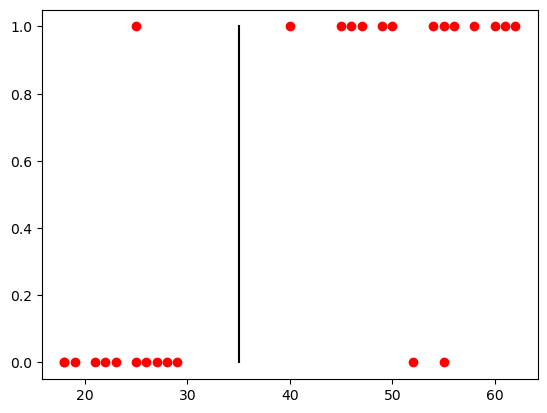

In [26]:
plt.plot(df.age, df.bought_insurance, "ro")
plt.plot([35, 35], [0, 1], "black")

In [27]:
df.bought_insurance.info()

<class 'pandas.core.series.Series'>
RangeIndex: 27 entries, 0 to 26
Series name: bought_insurance
Non-Null Count  Dtype
--------------  -----
27 non-null     int32
dtypes: int32(1)
memory usage: 240.0 bytes


In [28]:
data = df.drop("bought_insurance", axis=1)

logistic_insurance_model = linear_model.LogisticRegression(
    max_iter=10)  # deafult iterations number is 10
logistic_insurance_model.fit(data, df.bought_insurance)

LogisticRegression(max_iter=10)

In [29]:
logistic_insurance_model.predict([[38.85]])  # the line between 38.84 and 38.85

array([0])

In [30]:
logistic_insurance_model.score(data, df.bought_insurance)

0.7777777777777778

In [31]:
logistic_insurance_model.predict_proba([[
    22
]])  # it is making two Percentage value and choose the answer from the biggest

array([[0.66587127, 0.33412873]])

**model.coef_ indicates value of m in y=m*x + b equation**

In [32]:
logistic_insurance_model.coef_

array([[0.0279577]])

**model.intercept_ indicates value of b in y=m*x + b equation**

In [33]:
logistic_insurance_model.intercept_

array([-1.30463934])

**Lets defined sigmoid function now and do the math with hand**

In [34]:
import math


def sigmoid(y):
    return 1 / (1 + math.exp(-y))


def prediction_function(age):
    y = 0.1094324 * age - 3.92618657  # 0.04150133 ~ 0.042 and -1.52726963 ~ -1.53
    res = sigmoid(y)
    return res


print(prediction_function(20))  # age is 20
print(prediction_function(60))  # age is 60

0.14962585182902874
0.933376881921639


<h2 align='center'>Training And Testing Available Data</h2>


Spliting data to 70% Training Data and 30% Testing Data to Compare the Accuarcy that must be less Than 10% diffrent

In [35]:
data = pd.read_csv("Data/carprices.csv")
data

,Mileage,Age(yrs),Sell Price($)
0,69000,6,18000
1,35000,3,34000
2,57000,5,26100
3,22500,2,40000
4,46000,4,31500
5,59000,5,26750
6,52000,5,32000
7,72000,6,19300
8,91000,8,12000
9,67000,6,22000


In [36]:
Feature = data.drop('Sell Price($)', axis=1)

In [37]:
y = data['Sell Price($)']

x ==> features ( to be trained )<br>
x train 
x test 

y ==> result ( to be predicted )<br>
y train 
y test 

In [38]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(Feature,
                                                    y,
                                                    test_size=0.3,
                                                    random_state=11)
# test_size 0.3 -> 70% train 30% test
# random_state -> random Code

print(len(X_train), len(y_train))
print(len(X_test), len(y_test))
print(len(data))

14 14
6 6
20


In [39]:
carReg = linear_model.LinearRegression()
carReg.fit(X_train, y_train)

LinearRegression()

In [40]:
print(carReg.score(X_train, y_train), '\n', carReg.score(X_test, y_test))

0.9582732722167502 
 0.819593892885804


### Example:
 Using sklearn.datasets (loaddigits): data of images of numbers from 0 to 9 

In [41]:
from sklearn.datasets import load_digits  # dataset of 8*8 images of numbers from 0 to 9

digits = load_digits()
print("The Data Loaded : \n", dir(digits), "\n_________________")
print("The Target is : \n", digits.target, "\n_________________")
print("Data for the target : \n", digits.data, "\n_________________")
print("Image of target 0 Matrix :\n", digits.data[0])

The Data Loaded : 
 ['DESCR', 'data', 'feature_names', 'frame', 'images', 'target', 'target_names'] 
_________________
The Target is : 
 [0 1 2 ... 8 9 8] 
_________________
Data for the target : 
 [[ 0.  0.  5. ...  0.  0.  0.]
 [ 0.  0.  0. ... 10.  0.  0.]
 [ 0.  0.  0. ... 16.  9.  0.]
 ...
 [ 0.  0.  1. ...  6.  0.  0.]
 [ 0.  0.  2. ... 12.  0.  0.]
 [ 0.  0. 10. ... 12.  1.  0.]] 
_________________
Image of target 0 Matrix :
 [ 0.  0.  5. 13.  9.  1.  0.  0.  0.  0. 13. 15. 10. 15.  5.  0.  0.  3.
 15.  2.  0. 11.  8.  0.  0.  4. 12.  0.  0.  8.  8.  0.  0.  5.  8.  0.
  0.  9.  8.  0.  0.  4. 11.  0.  1. 12.  7.  0.  0.  2. 14.  5. 10. 12.
  0.  0.  0.  0.  6. 13. 10.  0.  0.  0.]


In [42]:
df = pd.DataFrame(digits.data)
df["target"] = digits.target  # adding Column target to tell us which number is it
df

,0,1,2,3,4,5,6,7,8,9,...,55,56,57,58,59,60,61,62,63,target
0,0.0,0.0,5.0,13.0,9.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,6.0,13.0,10.0,0.0,0.0,0.0,0
1,0.0,0.0,0.0,12.0,13.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,11.0,16.0,10.0,0.0,0.0,1
2,0.0,0.0,0.0,4.0,15.0,12.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,3.0,11.0,16.0,9.0,0.0,2
3,0.0,0.0,7.0,15.0,13.0,1.0,0.0,0.0,0.0,8.0,...,0.0,0.0,0.0,7.0,13.0,13.0,9.0,0.0,0.0,3
4,0.0,0.0,0.0,1.0,11.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,2.0,16.0,4.0,0.0,0.0,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1792,0.0,0.0,4.0,10.0,13.0,6.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,2.0,14.0,15.0,9.0,0.0,0.0,9
1793,0.0,0.0,6.0,16.0,13.0,11.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,6.0,16.0,14.0,6.0,0.0,0.0,0
1794,0.0,0.0,1.0,11.0,15.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,2.0,9.0,13.0,6.0,0.0,0.0,8
1795,0.0,0.0,2.0,10.0,7.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,5.0,12.0,16.0,12.0,0.0,0.0,9


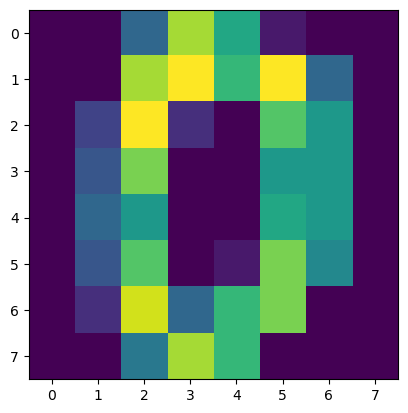

In [43]:
plt.imshow(
    digits.images[0]
)  # showing the image that represent of row 0 that have the target 0

<Figure size 640x480 with 0 Axes>

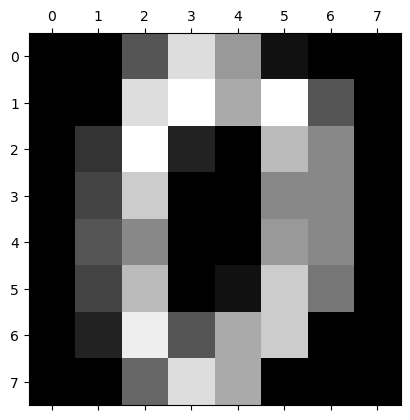

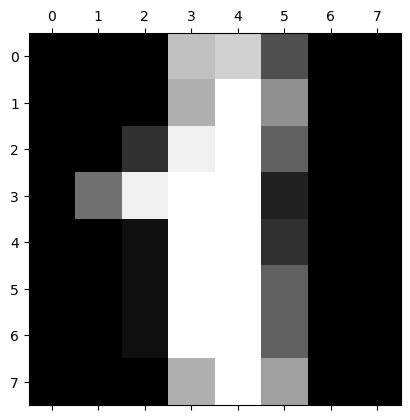

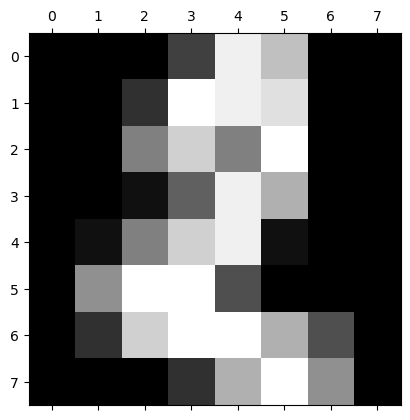

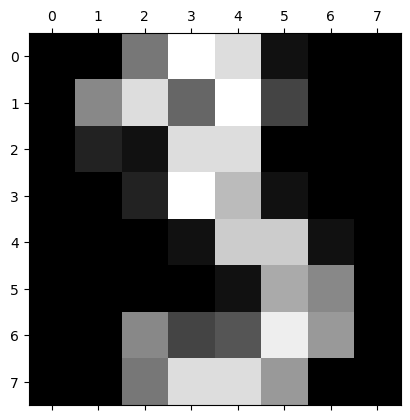

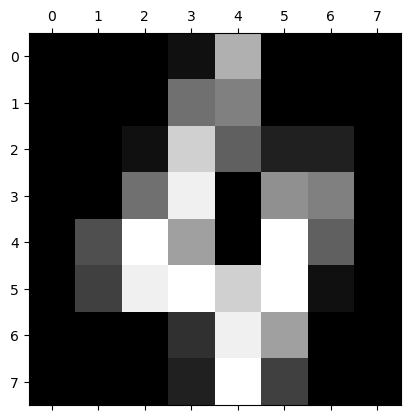

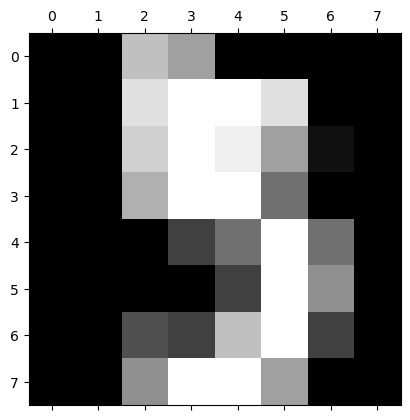

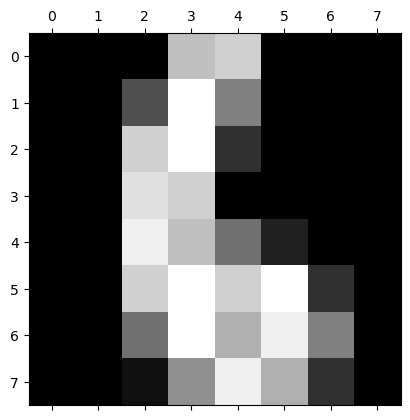

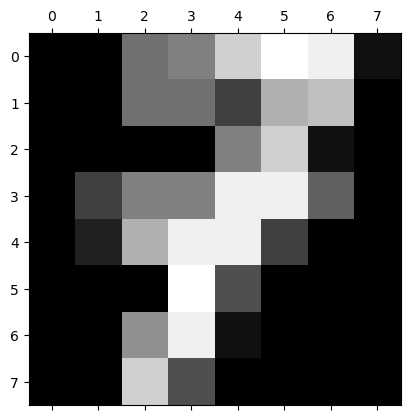

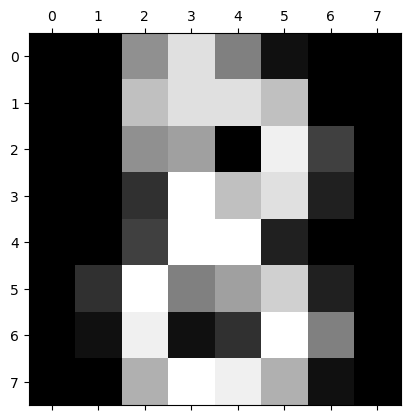

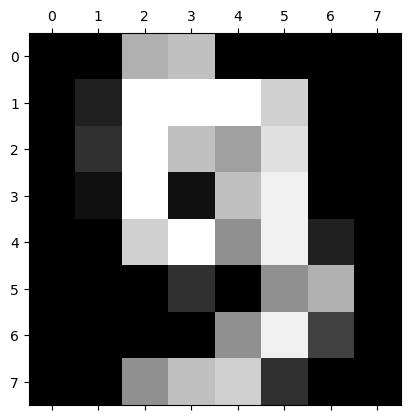

In [44]:
plt.gray()  # showing them in gray Theme
for i in range(10):  # showing Images from 0 to 9
    plt.matshow(digits.images[i])

<h4 style='color:blue'>Create and train logistic regression model</h4>

In [45]:
x = digits.data  # pixel values of images
y = digits.target  # targets name

In [46]:
# Spiliting the data to train and test
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x,
                                                    y,
                                                    test_size=0.3,
                                                    random_state=10)

In [47]:
model = linear_model.LogisticRegression(
    max_iter=1000)  # The 10 iteration isnt enough for this training
model.fit(x_train, y_train)

LogisticRegression(max_iter=1000)

In [48]:
print(model.predict(digits.data[0:5]))  # ourmodel predicticing
print(digits.target[0:5])  # The true target
print("Training Score : ", model.score(x_train, y_train), "\nTest Score : ",
      model.score(x_test, y_test))

[0 1 2 3 4]
[0 1 2 3 4]
Training Score :  1.0 
Test Score :  0.9611111111111111


<h4 style='color:blue'>Confusion Matrix </h4> Is Matrix that returns x as the real values and y is the predictied values to check our model accuracy with visualization

In [49]:
y_predicted = model.predict(x_test)

In [50]:
from sklearn.metrics import confusion_matrix

CM = confusion_matrix(
    y_test, y_predicted)  # compare between predicted values, actual values
CM

array([[51,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0, 55,  1,  0,  0,  0,  0,  0,  1,  0],
       [ 0,  0, 55,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  1, 54,  0,  1,  0,  0,  0,  0],
       [ 0,  2,  0,  0, 48,  0,  0,  0,  1,  0],
       [ 0,  1,  0,  0,  0, 49,  0,  1,  0,  0],
       [ 0,  1,  0,  0,  0,  0, 54,  0,  0,  0],
       [ 0,  0,  0,  2,  1,  0,  0, 57,  0,  0],
       [ 1,  0,  1,  1,  0,  0,  1,  0, 45,  1],
       [ 0,  0,  0,  0,  0,  1,  0,  0,  2, 51]], dtype=int64)

<h5 style="color:blue">AS YOU SEE : <pre><br> there is 0 times the model predctied 0 wrong and 51 times correct<br> there is 2 times the model predctied 1 wrong and 55 times correct<br> there is 0 times ...</pre>
So The over fitting times will be the sum of every value not in the Martex diameter</h5>

#####  Heating Map Is the visualization Way

Text(50.722222222222214, 0.5, 'Truth')

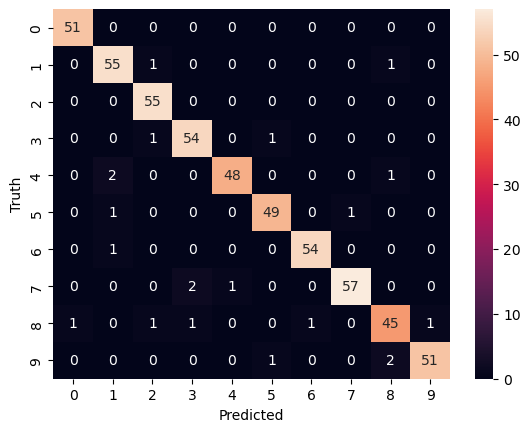

In [51]:
import seaborn as sn

sn.heatmap(CM, annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')

 <hr><h3 style="color:darkred" align="center"> (D) Machine Learning With Python: Decision Tree</h3>

In [52]:
Tree_data = pd.read_csv("Data/salaries_DesTree_data.csv")
Tree_data

,company,job,degree,salary_more_then_100k
0,google,sales executive,bachelors,0
1,google,sales executive,masters,0
2,google,business manager,bachelors,1
3,google,business manager,masters,1
4,google,computer programmer,bachelors,0
5,google,computer programmer,masters,1
6,abc pharma,sales executive,masters,0
7,abc pharma,computer programmer,bachelors,0
8,abc pharma,business manager,bachelors,0
9,abc pharma,business manager,masters,1


<h4 style=color:darkred> If you want to understand how to get decision of who is getting salary more than 100k you are going to make some if_else tree
<br><br><br>
<ul><h5 style=color:black>
<li>if company == Facebook then he will always get more than 100k </li>
<br>
<li><pre style=color:black>
else if company == abc pharma There is one conditions <br>
if job is business manager and  have master degree then he will get more than 100k
</pre></li>
<br>
<li><pre style=color:black>
else if company == google There is two conditions <br>
if job is computer programmer and  have master degree then he will get more than 100k
<pre style=color:black>else if job is business manager then he will get more than 100k</pre>
</pre></li>
</h5></ul></h4>

<h2 style=color:darkblue> Descion Tree is making this conditions into a model</h2>

##### models cannot work with str so we are going to make Encoder


In [53]:
for i in Tree_data.columns:
    print(i, len(Tree_data[i].value_counts()))

company 3
job 3
degree 2
salary_more_then_100k 2


In [54]:
inputs = Tree_data.drop('salary_more_then_100k', axis='columns')  # x
target = Tree_data['salary_more_then_100k']  # y

In [55]:
from sklearn.preprocessing import LabelEncoder

le_company = LabelEncoder()
le_job = LabelEncoder()
le_degree = LabelEncoder()

inputs['company_n'] = le_company.fit_transform(inputs['company'])
inputs['job_n'] = le_job.fit_transform(inputs['job'])
inputs['degree_n'] = le_degree.fit_transform(inputs['degree'])

# droping the oldest coulms
inputs_n = inputs.drop(['company', 'job', 'degree'], axis='columns')
inputs_n

# Company:
# google = 2, Facebook = 1, abc = 1

# Job:
# sales executive = 2, computer programmer = 1,business manager = 0

# Degree:
# master = 1, bachelors = 0

,company_n,job_n,degree_n
0,2,2,0
1,2,2,1
2,2,0,0
3,2,0,1
4,2,1,0
5,2,1,1
6,0,2,1
7,0,1,0
8,0,0,0
9,0,0,1


In [56]:
from sklearn import tree

model = tree.DecisionTreeClassifier()
model.fit(inputs_n, target)

DecisionTreeClassifier()

In [57]:
model.score(inputs_n, target)

1.0

In [58]:
model.feature_importances_  # the importance of the 3 features ( company , job , degree )

array([0.4       , 0.46666667, 0.13333333])

In [59]:
# making dictionory to make it easier to call the predict

company = {"Google": 2, "Abc Farma": 0, "Facebook": 1}
job = {"Business Manager": 0, "Computer Programmer": 1, "Sales exectuive ": 2}
degree = {"Bachelor": 0, "Master": 1}

In [60]:
model.predict(
    [[company["Google"], job["Business Manager"], degree["Bachelor"]]])

array([1], dtype=int64)

 <hr><h3 style="color:darkred" align="center"> (E) Machine Learning With Python: Random Forest</h3>

<h3>Random Forest is a DecisionTree that makes Decision from a number of Desision trees
</h3><h4>
example :<pre>
first tree answer 1
second tree answer 2
third tree answer 1

the random forest is desicion tree that takes the answer from those trees
random forest answer 1</pre></h4>

In [61]:
from sklearn.datasets import load_digits  # dataset of 8*8 images of numbers from 0 to 9

digits = load_digits()
x = digits.data  # pixel values of images
y = digits.target  # targets name

# Spiliting the data to train and test
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x,
                                                    y,
                                                    test_size=0.3,
                                                    random_state=10)

In [62]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(
    n_estimators=1000)  # the number of decision trees
model.fit(x_train, y_train)

RandomForestClassifier(n_estimators=1000)

In [63]:
print(model.score(x_train, y_train))
print(model.score(x_test, y_test))

1.0
0.9666666666666667


Text(50.722222222222214, 0.5, 'Truth')

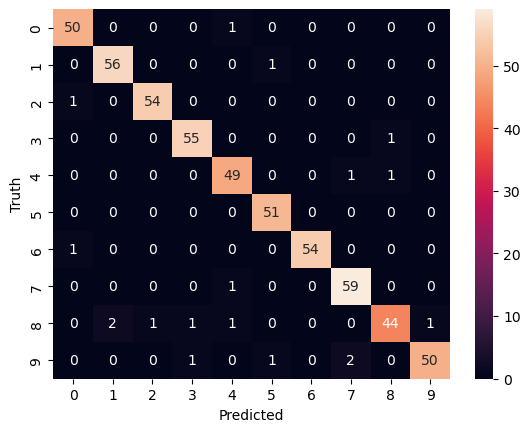

In [64]:
y_predicted = model.predict(x_test)

from sklearn.metrics import confusion_matrix

CM = confusion_matrix(
    y_test, y_predicted)  # compare between predicted values, actual values

import seaborn as sn

sn.heatmap(CM, annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')

 <hr><h3 style="color:darkred" align="center"> (F) Machine Learning With Python: Support Vector Machine (SVM)</h3>
 SVM Technique split the data into groups

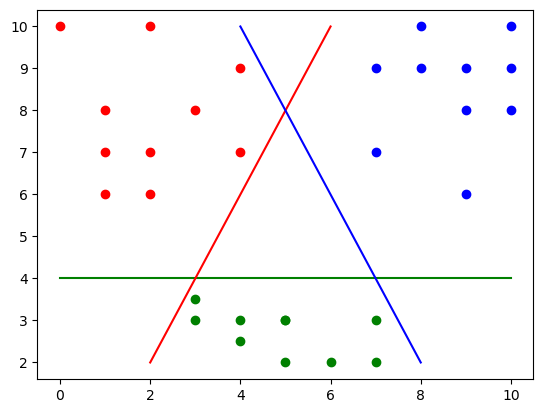

In [65]:
red_x = [0, 2, 2, 1, 3, 4, 4, 1, 2, 1]
red_y = [10, 10, 6, 8, 8, 9, 7, 7, 7, 6]
blue_x = [10, 10, 7, 9, 7, 10, 9, 8, 8, 9]
blue_y = [9, 10, 9, 6, 7, 8, 9, 9, 10, 8]
green_x = [5, 3, 3, 4, 5, 6, 4, 7, 7, 5]
green_y = [2, 3, 3.5, 3, 3, 2, 2.5, 2, 3, 3]
plt.plot(red_x, red_y, "ro")
plt.plot(blue_x, blue_y, "bo")
plt.plot(green_x, green_y, "go")
plt.plot([0, 10], [4, 4], "green")
plt.plot([2, 6], [2, 10], "red")
plt.plot([8, 4], [2, 10], "blue")

In [66]:
import pandas as pd
from sklearn.datasets import load_iris

iris = load_iris()

In [67]:
print(iris.target_names)
print(iris.feature_names)

['setosa' 'versicolor' 'virginica']
['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']


In [68]:
df = pd.DataFrame(iris.data, columns=iris.feature_names)
df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [69]:
df['target'] = iris.target
df0 = df[df.target == 0]
df1 = df[df.target == 1]
df2 = df[df.target == 2]

**Sepal length vs Sepal Width (Setosa vs Versicolor)**

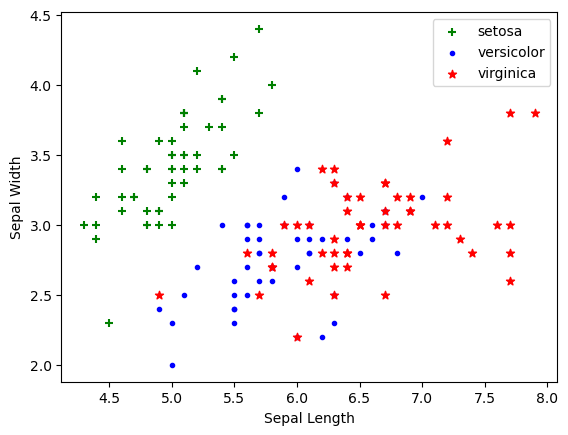

In [70]:
plt.xlabel('Sepal Length')
plt.ylabel('Sepal Width')
plt.scatter(df0['sepal length (cm)'],
            df0['sepal width (cm)'],
            color="green",
            marker='+',
            label=iris.target_names[0])
plt.scatter(df1['sepal length (cm)'],
            df1['sepal width (cm)'],
            color="blue",
            marker='.',
            label=iris.target_names[1])
plt.scatter(df2['sepal length (cm)'],
            df2['sepal width (cm)'],
            color="red",
            marker='*',
            label=iris.target_names[2])
plt.legend()
plt.show()

**Petal length vs Pepal Width (Setosa vs Versicolor)**

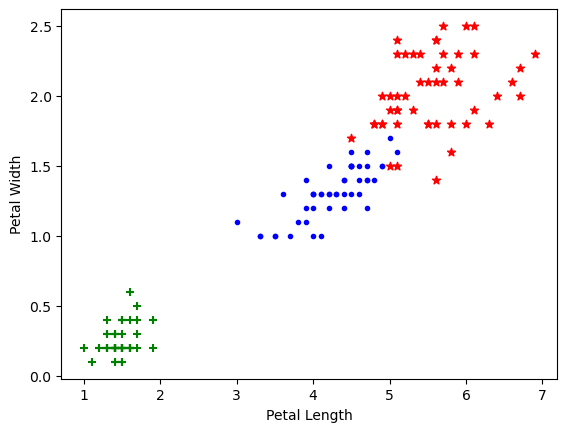

In [71]:
plt.xlabel('Petal Length')
plt.ylabel('Petal Width')
plt.scatter(df0['petal length (cm)'],
            df0['petal width (cm)'],
            color="green",
            marker='+')
plt.scatter(df1['petal length (cm)'],
            df1['petal width (cm)'],
            color="blue",
            marker='.')
plt.scatter(df2['petal length (cm)'],
            df2['petal width (cm)'],
            color="red",
            marker='*')

**Train Using Support Vector Machine (SVM)**

In [72]:
from sklearn.model_selection import train_test_split

In [73]:
X = df.drop(['target'], axis='columns')
y = df.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [74]:
from sklearn.svm import SVC  # support vector classifier

model = SVC()
# also : SVR:  support vector regressor

In [75]:
model.fit(X_train, y_train)

SVC()

In [76]:
print(model.score(X_test, y_test))
print(model.score(X_train, y_train))

1.0
0.975


**Tune parameters**

#### 1. Regularization (C)
Shifting the line between the groups

In [77]:
model_C = SVC(C=10)
model_C.fit(X_train, y_train)
print(model_C.score(X_test, y_test))
print(model_C.score(X_train, y_train))

0.9666666666666667
0.9916666666666667


In [78]:
model_C = SVC(C=0.01)  #hypermeter
model_C.fit(X_train, y_train)
model_C.score(X_test, y_test)
print(model_C.score(X_train, y_train))

0.35833333333333334


<h5> 2. Gamma</h5>
The Size of the space around the points

In [79]:
model_g = SVC(gamma=5)
model_g.fit(X_train, y_train)
model_g.score(X_test, y_test)

0.9333333333333333

##### 3. Kernel

In [80]:
model_linear_kernal = SVC(kernel='rbf')  # rbf or Linear
model_linear_kernal.fit(X_train, y_train)

SVC()

In [81]:
model_linear_kernal.score(X_test, y_test)

1.0

# KFold Cross Validation Python Tutorial¶

<h5 > If you have insufficient data Kfold technique split it to 
    <pre>
    train 1 2 3 4 5 6 7  test 8 9 10
    train 1 2 3 4 8 9 10 test 5 6 7
    train 4 5 6 7 8 9 10 test 1 2 3
</pre>
So You can Train ur model for all the data and get best score
</h5>

**Basic example:**

In [82]:
kf = model_selection.KFold(n_splits=3)  # k = 3
kf

KFold(n_splits=3, random_state=None, shuffle=False)

In [83]:
for train_index, test_index in kf.split([1, 2, 3, 4, 5, 6, 7, 8,
                                         9]):  # 9 : 30%
    print(train_index, test_index)

[3 4 5 6 7 8] [0 1 2]
[0 1 2 6 7 8] [3 4 5]
[0 1 2 3 4 5] [6 7 8]


#### Data:

In [84]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(digits.data,
                                                    digits.target,
                                                    test_size=0.3)

**Logistic regression model performance using cross_val_score**

In [85]:
model_selection.cross_val_score(linear_model.LogisticRegression(
    solver='liblinear', multi_class='ovr'),
                                digits.data,
                                digits.target,
                                cv=3)  # train 3 times

array([0.89482471, 0.95325543, 0.90984975])

**svm model performance using cross_val_score**

In [86]:
model_selection.cross_val_score(SVC(), digits.data, digits.target, cv=5)

array([0.96111111, 0.94444444, 0.98328691, 0.98885794, 0.93871866])

**random forest performance using cross_val_score**

In [87]:
model_selection.cross_val_score(RandomForestClassifier(n_estimators=100),
                                digits.data,
                                digits.target,
                                cv=3)

array([0.93823038, 0.94991653, 0.92487479])

<h2 >Clustering With K Means "Grouping"</h2>
Grouping data to groups with near feauters<br>
Note "the best number of groups is the smallest one"

In [88]:
from sklearn.cluster import KMeans
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from matplotlib import pyplot as plt

In [89]:
data = pd.read_csv("Data/Kmean_data_income.csv")
data

,Name,Age,Income($)
0,Rob,27,70000
1,Michael,29,90000
2,Mohan,29,61000
3,Ismail,28,60000
4,Kory,42,150000
5,Gautam,39,155000
6,David,41,160000
7,Andrea,38,162000
8,Brad,36,156000
9,Angelina,35,130000


##### From The plot you can see that the pest Groups number is  [ 3 ]

Text(0, 0.5, 'Income($)')

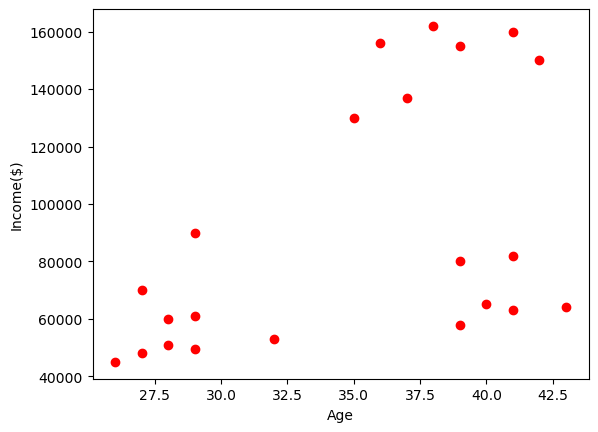

In [90]:
plt.plot(data.Age, data['Income($)'], "ro")
plt.xlabel('Age')
plt.ylabel('Income($)')

In [91]:
km = KMeans(n_clusters=3)  # n_clusters = the best number of  groups
y_predicted = km.fit_predict(data[['Age',
                                   'Income($)']])  # the group of every row
data["cluster"] = y_predicted
data
# group 1 : 0 , Group 2 : 1,  group 3 : 2

,Name,Age,Income($),cluster
0,Rob,27,70000,0
1,Michael,29,90000,0
2,Mohan,29,61000,2
3,Ismail,28,60000,2
4,Kory,42,150000,1
5,Gautam,39,155000,1
6,David,41,160000,1
7,Andrea,38,162000,1
8,Brad,36,156000,1
9,Angelina,35,130000,1


#### Visualization to see the 3 Groups

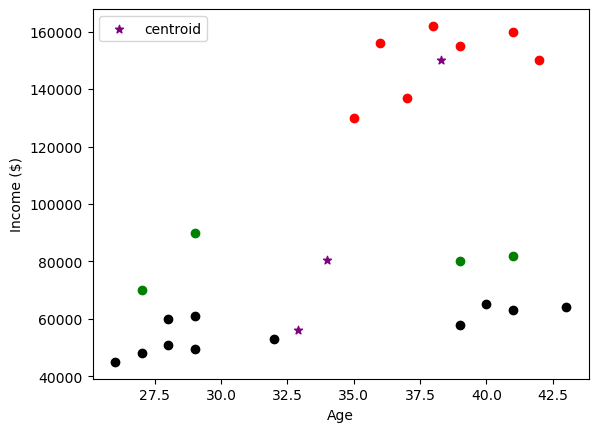

In [92]:
df1 = data[data.cluster == 0]  # group 0
df2 = data[data.cluster == 1]  # group 1
df3 = data[data.cluster == 2]  # group 2

plt.scatter(df1.Age, df1['Income($)'], color='green')
plt.scatter(df2.Age, df2['Income($)'], color='red')
plt.scatter(df3.Age, df3['Income($)'], color='black')
plt.scatter(km.cluster_centers_[:, 0],
            km.cluster_centers_[:, 1],
            color='purple',
            marker='*',
            label='centroid')  #centers
plt.xlabel('Age')
plt.ylabel('Income ($)')
plt.legend()

<h4 style=color:blue> kmeans way cant work with big values like in come so the groups went wrong the to solve the proplem we need to scale the values into smaller scale "0 to 1"

<h4>Preprocessing using min max scaler</h4>

In [93]:
scaler = MinMaxScaler()  # Scaling from 0 to 1

scaler.fit(data[['Income($)']])
data['Income($)'] = scaler.transform(data[['Income($)']])

scaler.fit(data[['Age']])
data['Age'] = scaler.transform(data[['Age']])
# Values Scaled From 0 to 1
data

,Name,Age,Income($),cluster
0,Rob,0.058824,0.213675,0
1,Michael,0.176471,0.384615,0
2,Mohan,0.176471,0.136752,2
3,Ismail,0.117647,0.128205,2
4,Kory,0.941176,0.897436,1
5,Gautam,0.764706,0.940171,1
6,David,0.882353,0.982906,1
7,Andrea,0.705882,1.000000,1
8,Brad,0.588235,0.948718,1
9,Angelina,0.529412,0.726496,1


#### Re Training with the new values scale

In [94]:
km = KMeans(n_clusters=3)
y_predicted = km.fit_predict(data[['Age', 'Income($)']])
data['cluster'] = y_predicted
y_predicted

array([1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0])

#### Visualization to see the 3 Groups

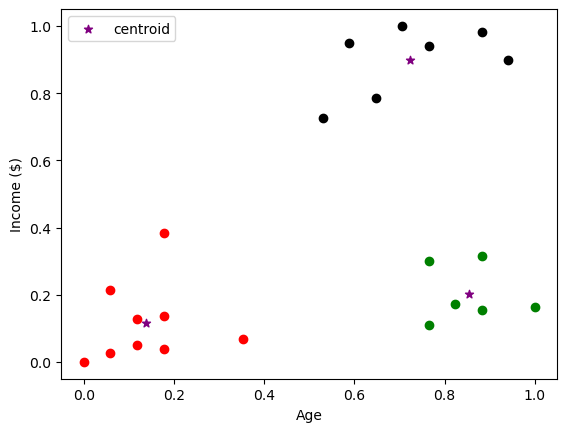

In [95]:
df1 = data[data.cluster == 0]  # group 0
df2 = data[data.cluster == 1]  # group 1
df3 = data[data.cluster == 2]  # group 2

plt.scatter(df1.Age, df1['Income($)'], color='green')
plt.scatter(df2.Age, df2['Income($)'], color='red')
plt.scatter(df3.Age, df3['Income($)'], color='black')
plt.scatter(km.cluster_centers_[:, 0],
            km.cluster_centers_[:, 1],
            color='purple',
            marker='*',
            label='centroid')  #centers
plt.xlabel('Age')
plt.ylabel('Income ($)')
plt.legend()

<h4 style=color:blue> Now we are Facing new problem as you see in this plot its easy to find that u just need 3 groups but if its no easy in visual u will need to use Elbow technique

<h4 >Elbow Plot</h4>

In [96]:
import warnings

warnings.filterwarnings("ignore")  # Ignore DeprecationWarning

sse = []
for i in range(1, 10):
    km = KMeans(n_clusters=i)
    km.fit(data[['Age', 'Income($)']])
    sse.append(km.inertia_)  # iterita is the groupine error value
sse

[5.434011511988179,
 2.091136388699078,
 0.4750783498553096,
 0.34910470944195654,
 0.2963623258321304,
 0.21066678488010526,
 0.1685851223602976,
 0.13937852495507838,
 0.10188787724979426]

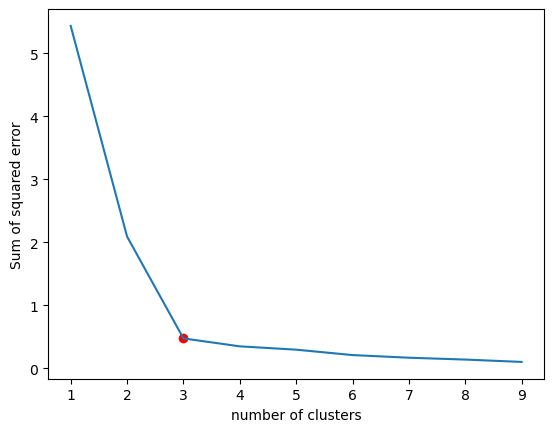

In [97]:
plt.plot([3], [[n for n in sse if n < 1][0]],
         "ro")  # the first less than 1 value
plt.plot(range(1, 10), sse)
plt.xlabel('number of clusters')
plt.ylabel('Sum of squared error')
plt.show()

<hr><h3 style="color:darkred" align="center"> (G) Machine Learning With Python: Naive Bayes (NB)</h3>
 Used to detect Spam Messages
 
 <h5 style=color:darkblue>
    represent each data as a vector of numbers <br><br>
vector size = number of unique elements 
<br><br>
    
Data :<pre style = color:darkred>
hello, my name is ahmed, welcome to egypt, it is a great city to travel 
0      0    0  0    0       0    0   0     0  0  0 0      0    0    0
</pre>
Ex:<pre style = color:darkred>
My name is ahmed
[0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0]
</pre>
</h5>

In [98]:
df = pd.read_csv("Data/NB_data_spam.csv")
df.head()

,Category,Message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [99]:
df["spam"] = df["Category"].replace(to_replace=["ham", "spam"],
                                    value=[0, 1
                                           ])  # Changing the ham & spam to 0,1
df.head()

,Category,Message,spam
0,ham,"Go until jurong point, crazy.. Available only ...",0
1,ham,Ok lar... Joking wif u oni...,0
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,1
3,ham,U dun say so early hor... U c already then say...,0
4,ham,"Nah I don't think he goes to usf, he lives aro...",0


In [100]:
# Spiliting
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(df.Message,
                                                    df.spam,
                                                    train_size=.8)

<h4>Way one:</h4>

In [101]:
from sklearn.feature_extraction.text import CountVectorizer

v = CountVectorizer()
X_train_count = v.fit_transform(X_train.values)
X_train_count.toarray()[0].shape

(7736,)

In [102]:
from sklearn.naive_bayes import MultinomialNB

model = MultinomialNB()
model.fit(X_train_count, y_train)

MultinomialNB()

In [103]:
emails = [
    'Hey Mohamed, can we get together to watch football game tomorrow?',
    'Upto 20% discount on parking, exclusive offer just for you. Dont miss this reward!'
]
emails_count = v.transform(
    emails)  # transform the data to vector to predict it
model.predict(emails_count)

array([0, 1], dtype=int64)

#### Way Two:
### Pipeline

In [104]:
from sklearn.pipeline import Pipeline
# Writing Steps in a model to fiting them
clf = Pipeline([('vectorizer', CountVectorizer()), ('nb', MultinomialNB())])

In [105]:
clf.fit(X_train, y_train)

Pipeline(steps=[('vectorizer', CountVectorizer()), ('nb', MultinomialNB())])

In [106]:
clf.predict(emails)  # getting value without converting to vector manual

array([0, 1], dtype=int64)

<h3 align='center'>Finding best model and hyper parameter tunning using GridSearchCV</h3>

In [107]:
from sklearn import svm, datasets

iris = datasets.load_iris()
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(iris.data,
                                                    iris.target,
                                                    test_size=0.3,
                                                    random_state=20)

model = svm.SVC(kernel='rbf', C=30, gamma='auto')
model.fit(X_train, y_train)
model.score(X_test, y_test)

0.8888888888888888

**Manually try suppling models with different parameters to cross_val_score function with 5 fold cross validation**

In [108]:
from sklearn.model_selection import cross_val_score

cross_val_score(svm.SVC(kernel='linear', C=10, gamma='auto'),
                iris.data,
                iris.target,
                cv=5)

array([1.        , 1.        , 0.9       , 0.96666667, 1.        ])

In [109]:
cross_val_score(svm.SVC(kernel='rbf', C=30, gamma='auto'),
                iris.data,
                iris.target,
                cv=5)

array([0.96666667, 1.        , 0.9       , 0.93333333, 1.        ])

In [110]:
cross_val_score(svm.SVC(kernel='rbf', C=10, gamma='auto'),
                iris.data,
                iris.target,
                cv=5)

array([0.96666667, 1.        , 0.96666667, 0.96666667, 1.        ])

**Above approach is tiresome and very manual. We can use for loop as an alternative**

In [111]:
kernels = ['rbf', 'linear']
C = [1, 10, 20]
avg_scores = {}
for kval in kernels:
    for cval in C:
        cv_scores = cross_val_score(svm.SVC(kernel=kval, C=cval, gamma='auto'),
                                    iris.data,
                                    iris.target,
                                    cv=5)
        avg_scores[kval + '_' + str(cval)] = np.average(cv_scores)

avg_scores

{'rbf_1': 0.9800000000000001,
 'rbf_10': 0.9800000000000001,
 'rbf_20': 0.9666666666666668,
 'linear_1': 0.9800000000000001,
 'linear_10': 0.9733333333333334,
 'linear_20': 0.9666666666666666}

**From above results we can say that rbf with C=1 or 10 or linear with C=1 will give best performance**

<h4>Approach 3: Use GridSearchCV</h4>

GridSearchCV does exactly same thing as for loop above but in a single line of code

In [112]:
from sklearn.model_selection import GridSearchCV

clf = GridSearchCV(
    svm.SVC(gamma='auto'),
    {
        'C': [1, 10, 20],  # c values
        'kernel': ['rbf', 'linear']  #kernal choices
    },
    cv=5,
    return_train_score=False)  # cv : Loops

clf.fit(iris.data, iris.target)
clf.cv_results_  # Dictionry Of Every test

{'mean_fit_time': array([0.0012001 , 0.00099893, 0.00159731, 0.00120006, 0.00100012,
        0.00079989]),
 'std_fit_time': array([4.00233478e-04, 9.70220087e-07, 1.20444730e-03, 4.00257224e-04,
        8.03580262e-07, 3.99958263e-04]),
 'mean_score_time': array([0.00099998, 0.00040088, 0.0008028 , 0.00040016, 0.0007998 ,
        0.00080018]),
 'std_score_time': array([4.10190833e-07, 4.90972332e-04, 4.01477473e-04, 4.90096251e-04,
        3.99899579e-04, 7.48978742e-04]),
 'param_C': masked_array(data=[1, 1, 10, 10, 20, 20],
              mask=[False, False, False, False, False, False],
        fill_value='?',
             dtype=object),
 'param_kernel': masked_array(data=['rbf', 'linear', 'rbf', 'linear', 'rbf', 'linear'],
              mask=[False, False, False, False, False, False],
        fill_value='?',
             dtype=object),
 'params': [{'C': 1, 'kernel': 'rbf'},
  {'C': 1, 'kernel': 'linear'},
  {'C': 10, 'kernel': 'rbf'},
  {'C': 10, 'kernel': 'linear'},
  {'C': 20, 'ker

In [113]:
df = pd.DataFrame(clf.cv_results_)
df

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,param_kernel,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.001200,4.002335e-04,0.001000,4.101908e-07,1,rbf,"{'C': 1, 'kernel': 'rbf'}",0.966667,1.0,0.966667,0.966667,1.0,0.980000,0.016330,1
1,0.000999,9.702201e-07,0.000401,4.909723e-04,1,linear,"{'C': 1, 'kernel': 'linear'}",0.966667,1.0,0.966667,0.966667,1.0,0.980000,0.016330,1
2,0.001597,1.204447e-03,0.000803,4.014775e-04,10,rbf,"{'C': 10, 'kernel': 'rbf'}",0.966667,1.0,0.966667,0.966667,1.0,0.980000,0.016330,1
3,0.001200,4.002572e-04,0.000400,4.900963e-04,10,linear,"{'C': 10, 'kernel': 'linear'}",1.000000,1.0,0.900000,0.966667,1.0,0.973333,0.038873,4
4,0.001000,8.035803e-07,0.000800,3.998996e-04,20,rbf,"{'C': 20, 'kernel': 'rbf'}",0.966667,1.0,0.900000,0.966667,1.0,0.966667,0.036515,5
5,0.000800,3.999583e-04,0.000800,7.489787e-04,20,linear,"{'C': 20, 'kernel': 'linear'}",1.000000,1.0,0.900000,0.933333,1.0,0.966667,0.042164,6


In [114]:
df[['param_C', 'param_kernel', 'mean_test_score', "rank_test_score"]]

,param_C,param_kernel,mean_test_score,rank_test_score
0,1,rbf,0.980000,1
1,1,linear,0.980000,1
2,10,rbf,0.980000,1
3,10,linear,0.973333,4
4,20,rbf,0.966667,5
5,20,linear,0.966667,6


In [115]:
clf.best_params_  # Finding The Best Model Hyper parameters values

{'C': 1, 'kernel': 'rbf'}

In [116]:
clf.best_score_  # The Best Model Score

0.9800000000000001

### RandomizedSearchCV :

**Use RandomizedSearchCV to reduce number of iterations and with random combination of parameters. This is useful when you have too many parameters to try and your training time is longer. It helps reduce the cost of computation**

In [117]:
from sklearn.model_selection import RandomizedSearchCV

rs = RandomizedSearchCV(svm.SVC(gamma='auto'), {
    'C': [1, 10, 20],
    'kernel': ['rbf', 'linear']
},
                        cv=5,
                        return_train_score=False,
                        n_iter=2)
rs.fit(iris.data, iris.target)
pd.DataFrame(rs.cv_results_)[['param_C', 'param_kernel', 'mean_test_score']]

,param_C,param_kernel,mean_test_score
0,20,linear,0.966667
1,10,linear,0.973333


**How about different models with different hyperparameters?**

In [118]:
from sklearn import svm
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression

# Making Dic The Key is ModelName

model_params = {
    'svm': {
        'model': svm.SVC(gamma='auto'),
        'params': {
            'C': [1, 10, 20],
            'kernel': ['rbf', 'linear']
        }
    },
    'random_forest': {
        'model': RandomForestClassifier(),
        'params': {
            'n_estimators': [1, 5, 10]
        }
    },
    'logistic_regression': {
        'model': LogisticRegression(solver='liblinear', multi_class='auto'),
        'params': {
            'C': [1, 5, 10]
        }
    }
}

In [119]:
scores = []

for model_name, mp in model_params.items():
    clf = GridSearchCV(mp['model'],
                       mp['params'],
                       cv=5,
                       return_train_score=False)
    clf.fit(iris.data, iris.target)
    scores.append({
        'model': model_name,
        'best_score': clf.best_score_,
        'best_params': clf.best_params_
    })

df = pd.DataFrame(scores, columns=['model', 'best_score', 'best_params'])
df

,model,best_score,best_params
0,svm,0.980000,"{'C': 1, 'kernel': 'rbf'}"
1,random_forest,0.960000,{'n_estimators': 1}
2,logistic_regression,0.966667,{'C': 5}


 <hr><h3 style="color:darkred" align="center"> (H) Machine Learning With Python: Naive Bayes (NB)</h3>
The best algorithm

In [120]:
%pip install xgboost

Note: you may need to restart the kernel to use updated packages.


In [121]:
iris = load_iris()
x_train, x_test, y_train, y_test = model_selection.train_test_split(
    iris.data, iris.target, test_size=0.3)

In [122]:
# (multi:softmax) I use it when I have multiple classes (Classification problem)
model = xgb.XGBClassifier(objective="multi:softmax",
                          num_class=3,
                          random_state=42)
#but if I have one or two classes I will use this (binary:logistic)
model2 = xgb.XGBClassifier(objective="binary:logistic", random_state=42)
#but if I have a regression problem I will use this
model3 = xgb.XGBClassifier(objective="reg:squarederror", random_state=42)

model.fit(x_train, y_train)
model2.fit(x_train, y_train)
model3.fit(x_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, objective='multi:softprob', ...)

In [123]:
print("Model 1 : ", model.score(x_test, y_test),
      model.score(x_train, y_train))  #model1 score
print("Model 2 : ", model2.score(x_test, y_test),
      model2.score(x_train, y_train))  # model2 score
print("Model 3 : ", model3.score(x_test, y_test),
      model3.score(x_train, y_train))  #model3 score

Model 1 :  0.9333333333333333 1.0
Model 2 :  0.9333333333333333 1.0
Model 3 :  0.9333333333333333 1.0


##### AccuracyScore

In [124]:
y_pred1 = model.predict(x_test)
y_pred2 = model2.predict(x_test)
y_pred3 = model3.predict(x_test)

accuracy = accuracy_score(y_test, y_pred1)  #model1
print(f"Accuracy1: {accuracy * 100:.2f}%")

accuracy = accuracy_score(y_test, y_pred2)  #model2
print(f"Accuracy2: {accuracy * 100:.2f}%")

accuracy = accuracy_score(y_test, y_pred3)  #model3
print(f"Accuracy3: {accuracy * 100:.2f}%")

Accuracy1: 93.33%
Accuracy2: 93.33%
Accuracy3: 93.33%


<h1 align='center'>Saving The Model</h1>

In [125]:
df = pd.read_csv("Data/homeprices.csv")
y = df.price
x = df.drop("price", axis=1)
xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size=0.2)
model = linear_model.LinearRegression()
model.fit(xtrain, ytrain)

LinearRegression()

<h3 > Pickle :</h3>
<h4 style='color:darkred'>Save Model To a File Using Python Pickle: </h4>
<h6> Steps to save model :</h6>
<pre>"ModelName_ModelType_ModelAccuracy_ModelDate"<br></pre>
example:<br>
<pre>"example_LinearRegression_95Acc_21/1/2024"</pre>


In [126]:
import pickle  # .pickle extension model , h5. or .json,  games or programs.exe

In [127]:
with open('Data/model_pickle', 'wb') as file:  # write binary
    pickle.dump(model, file)  # put model into file

print(model.coef_)
print(model.intercept_)

[135.34482759]
183362.06896551716


<h4 style='color:DARKRED'>Load Saved Model</h4>

In [128]:
with open('Data/model_pickle', 'rb') as file:  # read binary
    ourModel = pickle.load(file)  # model is loaded into : ourModel

print(ourModel.coef_)
print(ourModel.intercept_)

[135.34482759]
183362.06896551716


<h3 > Joblib :</h3>
<h4 style='color:darkred'>Save Model To a File Using Python joblib: </h4>

In [129]:
import joblib

In [130]:
joblib.dump(model, 'Data/model_joblib')  # model name

['Data/model_joblib']

<h4 style='color:darkred'>Load Saved Model</h4>

In [131]:
saved_model = joblib.load('Data/model_joblib')
print(saved_model.coef_)
print(saved_model.intercept_)

[135.34482759]
183362.06896551716


<hr><h6 style="color: gray; font-family: 'dsfaf'; text-align: right;">By: Marslino Edward</h6>
